In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#load data
def loaddata(filename):
    file=open(filename)
    x=[]
    y=[]
    for line in file.readlines():
        line=line.strip().split()
        x.append([1,float(line[0]),float(line[1])])
        y.append([float(line[2])])
    xmat=np.mat(x)
    ymat=np.mat(y)
    file.close()            
    return xmat, ymat


In [56]:
#w calculate
def w_cal(xmat,ymat,alpha=0.001,maxiter=10001):
    #W init
    W=np.mat(np.random.randn(3,1))
    #W update (dcw=dc/dw)
    for i in range(maxiter):
        H=1/(1+np.exp(-xmat*W)) #H:(10,1)
        dcw=xmat.T*(H-ymat) #dcw:(3,1)
        W-=alpha*dcw
    return W
    

In [57]:
# implement
xmat, ymat=loaddata("log_reg.txt")
print(xmat,xmat.shape)
print(ymat,ymat.shape)


[[1. 2. 1.]
 [1. 2. 2.]
 [1. 5. 4.]
 [1. 4. 5.]
 [1. 2. 3.]
 [1. 3. 2.]
 [1. 6. 5.]
 [1. 4. 1.]
 [1. 6. 3.]
 [1. 7. 4.]] (10, 3)
[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]] (10, 1)


W: [[-6.26830442]
 [ 0.86024109]
 [ 1.04788455]]


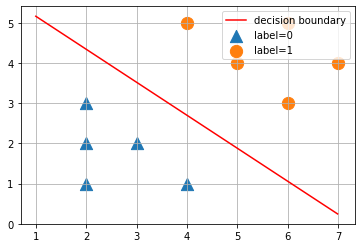

In [58]:
W=w_cal(xmat,ymat,0.01,1000)
print("W:",W)


w0=W[0,0]
w1=W[1,0]
w2=W[2,0]
plotx1=np.arange(1,7,0.01)
plotx2=-w0/w2-(w1/w2)*plotx1

plt.scatter(xmat[:,1][ymat==0].A,xmat[:,2][ymat==0].A,marker='^',s=150,label='label=0')
plt.scatter(xmat[:,1][ymat==1].A,xmat[:,2][ymat==1].A,s=150,label='label=1')
plt.plot(plotx1,plotx2,c='r',label='decision boundary')
plt.grid()
plt.legend()
plt.show()